In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp

In [9]:
df = pd.read_csv('E:\Machine learning project\Spam Classification\Email-SMS-Spam-Classification\dataset\spam_assassin.csv')
df.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [11]:
# encode target value in 0,1
from sklearn.preprocessing import LabelEncoder
endocer = LabelEncoder()

In [12]:
df['target'] = endocer.fit_transform(df['target'])

In [13]:
df.shape

(5796, 2)

In [14]:
df.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [15]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [16]:
df.duplicated().sum()

467

In [17]:
# remove duplicate value 
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5329, 2)

In [20]:
df.target.value_counts()

target
0    3638
1    1691
Name: count, dtype: int64

In [21]:
# 0 represent “not spam” and 1 represents “spam”.

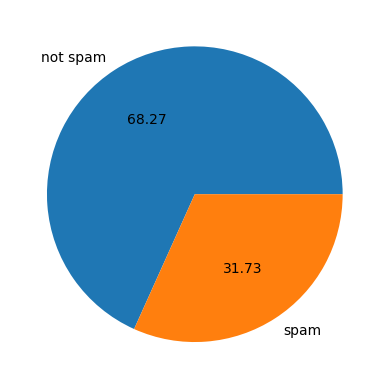

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk # this library help in find how many text, santance , repated words 

In [24]:
df['text']

0       From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...
1       From gort44@excite.com Mon Jun 24 17:54:21 200...
2       From fork-admin@xent.com Mon Jul 29 11:39:57 2...
3       From dcm123@btamail.net.cn Mon Jun 24 17:49:23...
4       From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...
                              ...                        
5791    From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...
5792    From fork-admin@xent.com Mon Oct 7 20:37:02 20...
5793    Received: from hq.pro-ns.net (localhost [127.0...
5794    From razor-users-admin@lists.sourceforge.net T...
5795    From rssfeeds@jmason.org Mon Sep 30 13:44:10 2...
Name: text, Length: 5329, dtype: object

In [25]:
# number of charater or alphabetes use in santance 
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,text,target,num_characters
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060


In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,text,target,num_characters,num_words
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098,818
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189,520
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598,640
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918,451
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060,620


In [29]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098,818,16
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189,520,13
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598,640,11
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918,451,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060,620,7


In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5329.000000,5329.000000,5329.000000
mean,4164.186527,799.701070,12.526178
std,6030.253952,908.281711,23.562535
min,362.000000,68.000000,1.000000
25%,2390.000000,447.000000,5.000000
50%,3296.000000,602.000000,8.000000
75%,4492.000000,840.000000,14.000000
max,232305.000000,18622.000000,809.000000


In [33]:
df[df.target==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3638.000000,3638.000000,3638.000000
mean,3461.003573,634.990654,11.539032
std,3173.399352,590.863255,22.573023
min,362.000000,68.000000,1.000000
25%,2400.250000,451.000000,5.000000
50%,3183.500000,581.000000,8.000000
75%,4054.250000,734.000000,13.000000
max,92469.000000,17677.000000,809.000000


In [34]:
df[df.target==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1691.000000,1691.000000,1691.000000
mean,5677.007096,1154.057363,14.649911
std,9466.602237,1290.541331,25.439274
min,736.000000,134.000000,1.000000
25%,2364.000000,429.000000,4.000000
50%,3809.000000,762.000000,9.000000
75%,6211.500000,1444.000000,16.000000
max,232305.000000,18622.000000,408.000000


<Axes: xlabel='num_characters', ylabel='Count'>

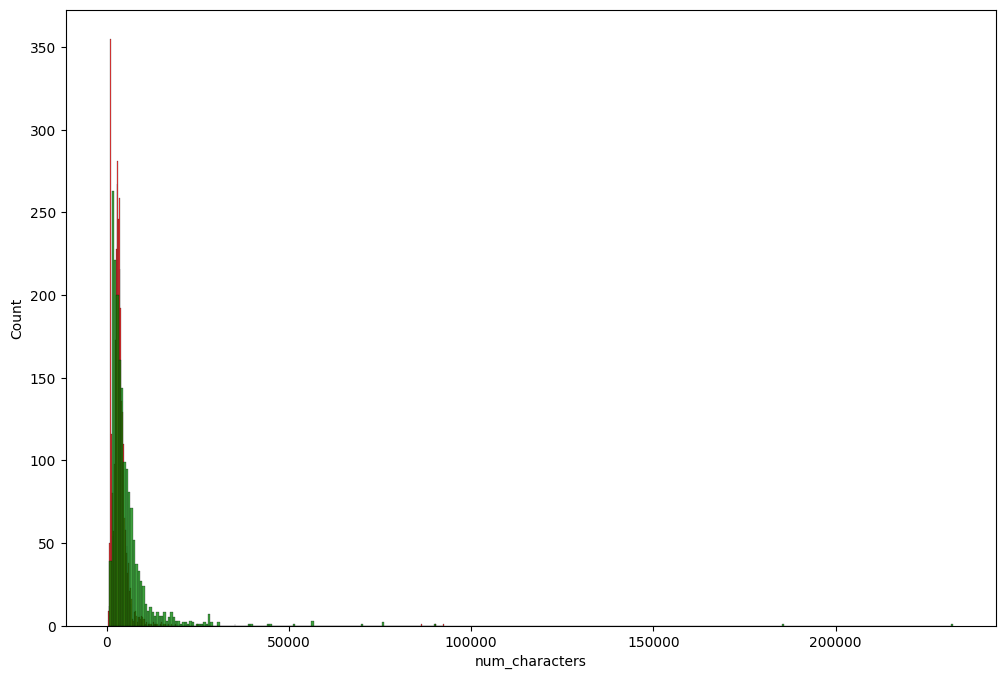

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df.target==0]['num_characters'],color='red')
sns.histplot(df[df.target==1]['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

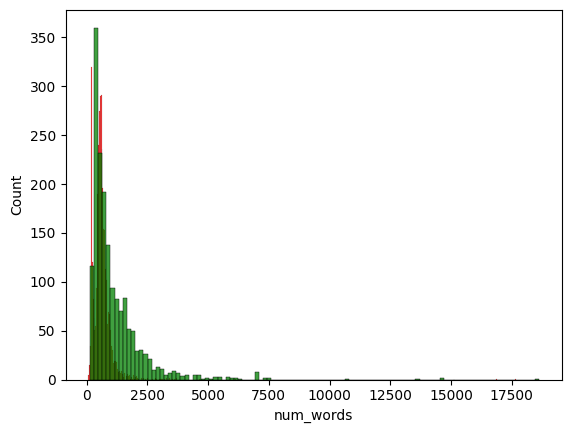

In [36]:
sns.histplot(df[df.target==0]['num_words'],color='red')
sns.histplot(df[df.target==1]['num_words'],color='green')

e:\Machine learning project\Spam Classification\Email-SMS-Spam-Classification\spamClassification_venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


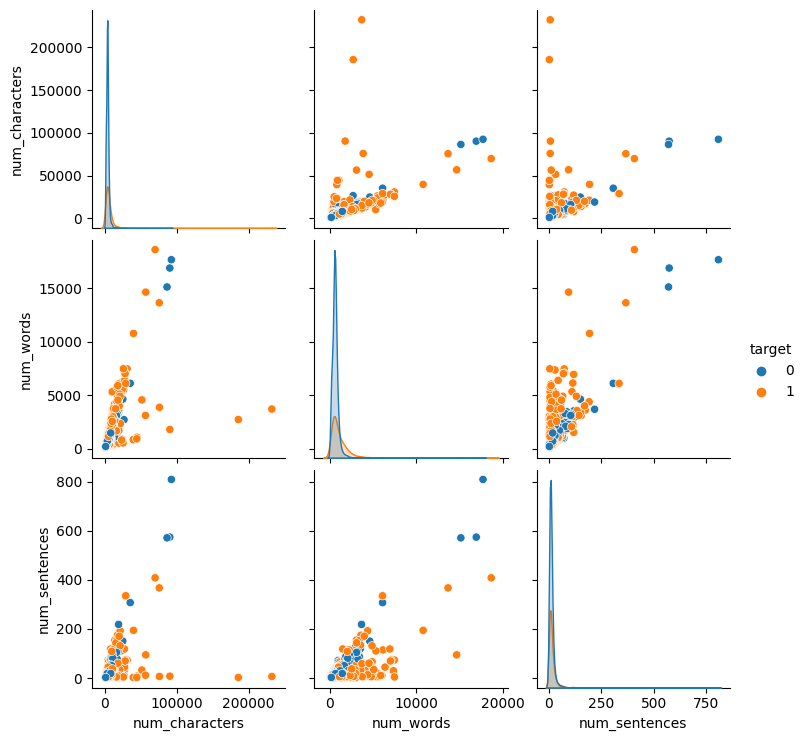

In [37]:
sns.pairplot(df,hue='target')

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('learning')
# Porterstemmer it remove verb in words and make orignal 

'learn'

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)


In [42]:
transform_text(
"From rpm-list-admin@freshrpms.net Thu Aug 29 11:01:06 2002 Return-Path: <rpm-zzzlist-admin@freshrpms.net> Delivered-To: yyyy@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 6AE6043F99 for <jm@localhost>; Thu, 29 Aug 2002 06:01:04 -0400 (EDT) Received: from phobos [127.0.0.1] by localhost with IMAP (fetchmail-5.9.0) for jm@localhost (single-drop); Thu, 29 Aug 2002 11:01:04 +0100 (IST) Received: from egwn.net (ns2.egwn.net [193.172.5.4]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7T0IgZ20518 for <jm-rpm@jmason.org>; Thu, 29 Aug 2002 01:18:42 +0100 Received: from auth02.nl.egwn.net (localhost [127.0.0.1]) by egwn.net (8.11.6/8.11.6/EGWN) with ESMTP id g7T0G6J12978; Thu, 29 Aug 2002 02:16:06 +0200 Received: from imf24bis.bellsouth.net (mail124.mail.bellsouth.net [205.152.58.84]) by egwn.net (8.11.6/8.11.6/EGWN) with ESMTP id g7T0FHJ03427 for <rpm-list@freshrpms.net>; Thu, 29 Aug 2002 02:15:17 +0200 Received: from adsl-157-16-61.msy.bellsouth.net ([66.157.16.61]) by imf24bis.bellsouth.net (InterMail vM.5.01.04.19 201-253-122-122-119-20020516) with ESMTP id <20020829001508.JZK24863.imf24bis.bellsouth.net@adsl-157-16-61.msy.bellsouth.net> for <rpm-list@freshrpms.net>; Wed, 28 Aug 2002 20:15:08 -0400 Subject: Re: ALSA (almost) made easy From: Lance <lance_tt@bellsouth.net> To: RPM-List <rpm-zzzlist@freshrpms.net> In-Reply-To: <1030576177.6448.1.camel@localhost.localdomain> References: <20020828004215.4bca2588.matthias@rpmforge.net> <1030507320.3214.39.camel@herald.dragonsdawn.net> <20020828100430.378c3856.matthias@rpmforge.net> <1030546780.3214.54.camel@herald.dragonsdawn.net> <20020828112645.B13047@ti19> <1030551945.10627.4.camel@wanderlust.prognet.com> <20020828190006.2200a154.matthias@rpmforge.net> <1030576177.6448.1.camel@localhost.localdomain> Content-Type: text/plain Content-Transfer-Encoding: 7bit X-Mailer: Ximian Evolution 1.0.8 (1.0.8-6) Message-Id: <1030580111.1388.2.camel@localhost.localdomain> MIME-Version: 1.0 X-Mailscanner: Found to be clean, Found to be clean Sender: rpm-zzzlist-admin@freshrpms.net Errors-To: rpm-zzzlist-admin@freshrpms.net X-Beenthere: rpm-zzzlist@freshrpms.net X-Mailman-Version: 2.0.11 Precedence: bulk Reply-To: rpm-zzzlist@freshrpms.net List-Help: <mailto:rpm-zzzlist-request@freshrpms.net?subject=help> List-Post: <mailto:rpm-zzzlist@freshrpms.net> List-Subscribe: <http://lists.freshrpms.net/mailman/listinfo/rpm-zzzlist>, <mailto:rpm-list-request@freshrpms.net?subject=subscribe> List-Id: Freshrpms RPM discussion list <rpm-zzzlist.freshrpms.net> List-Unsubscribe: <http://lists.freshrpms.net/mailman/listinfo/rpm-zzzlist>, <mailto:rpm-list-request@freshrpms.net?subject=unsubscribe> List-Archive: <http://lists.freshrpms.net/pipermail/rpm-zzzlist/> X-Original-Date: 28 Aug 2002 19:15:10 -0500 Date: 28 Aug 2002 19:15:10 -0500 Ok, I got ALSA installed and there is no static inbetween mp3s like before which is great! My setup is digital 4.1 but sound is only coming from front 2 speakers and subwoofer, rear speakers there is no sound. Also alsamixer or aumix are unresponsive as well. Lance On Wed, 2002-08-28 at 18:09, Lance wrote: > Thanks for this, I'm going to give them another try. One question: How > do I switch between digital out and analog out with ALSA? With > emu10k1-tools it's easy enough (emu-config -d for digital, emu-config -a > for analog) Is there a similar method with ALSA? > > Lance > > On Wed, 2002-08-28 at 12:00, Matthias Saou wrote: > > Followup to the story : > > > > I've now made a sub-package of alsa-driver called ""alsa-kernel"" which > > contains only the kernel modules, and alsa-driver contains everything else > > from the original package (device entries, include files and docs). > > > > This should allow installation of a single ""alsa-driver"" package and > > multiple ""alsa-kernel"" if you have more than one kernel installed. Right > > now the dependencies make it mandatory to have kernels installed through > > rpm... people who install from source can still install the ALSA modules > > from the source though ;-) > > > > The devices are there now, thank Gordon for reporting the problem (and as I > > said, you were the only one). Any further comments are very welcome! > > > > Download : http://ftp.freshrpms.net/pub/freshrpms/testing/alsa/ > > New spec : http://freshrpms.net/builds/alsa-driver/alsa-driver.spec > > > > If you aren't running kernel-2.4.18-10 for i686, simply --rebuild the > > alsa-driver source rpm and you'll get a package for your running kernel. > > > > Matthias > > > > -- > > Clean custom Red Hat Linux rpm packages : http://freshrpms.net/ > > Red Hat Linux release 7.3 (Valhalla) running Linux kernel 2.4.18-10 > > Load : 0.08 0.42 0.84, AC on-line, battery charging: 100% (6:36) > > > > _______________________________________________ > > RPM-List mailing list <RPM-List@freshrpms.net> > > http://lists.freshrpms.net/mailman/listinfo/rpm-list > -- > : > ####[ Linux One Stanza Tip (LOST) ]########################### > > Sub : Finding out files larger than given size LOST #324 > > To find out all files in a dir over a given size, try: > find /path/to/dir_of_file -type f -size +Nk > [Where N is a number like 1024 for 1mb, and multiples thereof] > > ####[Discussions on LIH : 04 Jul 2002]######################## > : > > > _______________________________________________ > RPM-List mailing list <RPM-List@freshrpms.net> > http://lists.freshrpms.net/mailman/listinfo/rpm-list -- : ####[ Linux One Stanza Tip (LOST) ]########################### Sub : Finding out files larger than given size LOST #324 To find out all files in a dir over a given size, try: find /path/to/dir_of_file -type f -size +Nk [Where N is a number like 1024 for 1mb, and multiples thereof] ####[Discussions on LIH : 04 Jul 2002]######################## : _______________________________________________ RPM-List mailing list <RPM-List@freshrpms.net> http://lists.freshrpms.net/mailman/listinfo/rpm-list"
)

'thu aug 29 2002 yyyi receiv localhost localhost postfix esmtp id 6ae6043f99 jm localhost thu 29 aug 2002 edt receiv phobo localhost imap jm localhost thu 29 aug 2002 ist receiv esmtp id g7t0igz20518 thu 29 aug 2002 receiv localhost esmtp id g7t0g6j12978 thu 29 aug 2002 receiv esmtp id g7t0fhj03427 thu 29 aug 2002 receiv intermail esmtp id wed 28 aug 2002 subject alsa almost made easi lanc refer ti19 7bit ximian evolut found clean found clean sender preced bulk mailto mailto http mailto freshrpm rpm discuss list http mailto http 28 aug 2002 date 28 aug 2002 ok got alsa instal static inbetween mp3 like great setup digit sound come front 2 speaker subwoof rear speaker sound also alsamix aumix unrespons well lanc wed lanc wrote thank go give anoth tri one question switch digit analog alsa easi enough digit analog similar method alsa lanc wed matthia saou wrote followup stori made call contain kernel modul contain everyth els origin packag devic entri includ file doc allow instal singl pac

In [43]:
df.text[10]

'From rssfeeds@jmason.org Fri Oct 4 11:02:10 2002 Return-Path: <rssfeeds@spamassassin.taint.org> Delivered-To: yyyy@localhost.spamassassin.taint.org Received: from localhost (jalapeno [127.0.0.1]) by jmason.org (Postfix) with ESMTP id 3C0DA16F6F for <jm@localhost>; Fri, 4 Oct 2002 11:01:47 +0100 (IST) Received: from jalapeno [127.0.0.1] by localhost with IMAP (fetchmail-5.9.0) for jm@localhost (single-drop); Fri, 04 Oct 2002 11:01:47 +0100 (IST) Received: from dogma.slashnull.org (localhost [127.0.0.1]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g9480QK08803 for <jm@jmason.org>; Fri, 4 Oct 2002 09:00:26 +0100 Message-Id: <200210040800.g9480QK08803@dogma.slashnull.org> To: yyyy@spamassassin.taint.org From: boingboing <rssfeeds@spamassassin.taint.org> Subject: Don\'t do the brown WiFi, the brown WiFi is BAD Date: Fri, 04 Oct 2002 08:00:25 -0000 Content-Type: text/plain; encoding=utf-8 URL: http://boingboing.net/#85515860 Date: Not supplied Rob "Pringles Can" Flickenger and othe

In [44]:
transform_text(df.text[10])

'rssfeed fri oct 4 2002 rssfeed yyyi receiv localhost jalapeno postfix esmtp id 3c0da16f6f jm localhost fri 4 oct 2002 ist receiv jalapeno localhost imap jm localhost fri 04 oct 2002 ist receiv localhost esmtp id g9480qk08803 jm fri 4 oct 2002 yyyi boingbo rssfeed subject brown wifi brown wifi bad date fri 04 oct 2002 url http 85515860 date suppli rob pringl flickeng other cliff skolnik os x con track caus annoy flaki wireless network everi 20 30 second start get connect refus messag browser rob pringl flickeng wrote turn run great app etherpeg 1 promiscu network sniffer firewal os x time caus comput begin intercept everi packet sent segment wireless network respond reject messag today rob everyon els know go run around tell peopl run etherpeg ah fickl network stern mistress link 2 discuss 3 thank rob 1 http 2 http 3 http'

In [45]:
df['trasformed_text']=df['text'].apply(transform_text)

In [46]:
df.head()

,text,target,num_characters,num_words,num_sentences,trasformed_text
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,4098,818,16,mon jul 29 2002 yyyi receiv localhost localhos...
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,2189,520,13,gort44 mon jun 24 2002 gort44 tue jun 4 2002 r...
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,3598,640,11,mon jul 29 2002 yyyi receiv localhost localhos...
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,1918,451,1,dcm123 mon jun 24 2002 dcm123 mon jun 10 2002 ...
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0,3060,620,7,mon aug 19 2002 yyyi receiv localhost localhos...


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc = wc.generate(df[df.target == 1]['trasformed_text'].str.cat(sep=" "))

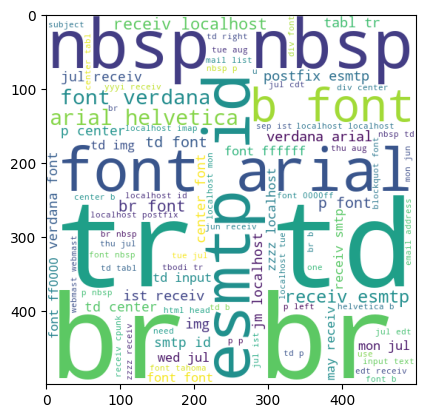

In [49]:
plt.imshow(spam_wc)

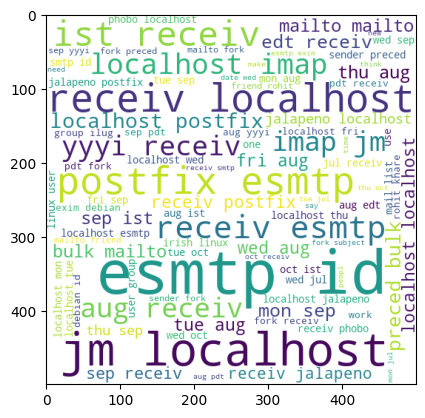

In [50]:
ham_wc = wc.generate(df[df.target == 0]['trasformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [51]:
#find most words use in spam 
spam_corpus=[]
for msg in df[df.target == 1 ]['trasformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
spam_corpus

['gort44',
 'mon',
 'jun',
 '24',
 '2002',
 'gort44',
 'tue',
 'jun',
 '4',
 '2002',
 'receiv',
 'esmtp',
 'id',
 'g544vfo20182',
 'jm',
 'tue',
 '4',
 'jun',
 '2002',
 'receiv',
 'smtp',
 'id',
 'g544vc729935',
 'tue',
 '4',
 'jun',
 '2002',
 'receiv',
 'unverifi',
 'emwac',
 'smtpr',
 'smtp',
 'id',
 'b0000918901',
 'tue',
 '04',
 'jun',
 '2002',
 'b0000918901',
 'chrbader',
 'ires',
 'gort44',
 'subject',
 'cash',
 'home',
 'equiti',
 'date',
 'tue',
 '04',
 'jun',
 '2002',
 '7bit',
 'mortgag',
 'lender',
 'broker',
 'readi',
 'compet',
 'busi',
 'whether',
 'new',
 'home',
 'loan',
 'seek',
 'refin',
 'current',
 'home',
 'loan',
 'lower',
 'interest',
 'rate',
 'help',
 'mortgag',
 'rate',
 'low',
 'year',
 'take',
 'action',
 'refin',
 'home',
 'us',
 'includ',
 'peski',
 'credit',
 'card',
 'bill',
 'use',
 'extra',
 'cash',
 'pool',
 'alway',
 'want',
 'other',
 'say',
 'say',
 'ye',
 'even',
 'turn',
 'elsewher',
 'help',
 'easi',
 'term',
 'mortgag',
 'referr',
 'servic',
 'c

In [53]:
len(spam_corpus)

579825

In [54]:
from collections import Counter
Counter(spam_corpus).most_common(40)

[('font', 17545),
 ('br', 16720),
 ('2002', 10860),
 ('http', 9581),
 ('td', 9172),
 ('receiv', 9115),
 ('nbsp', 9080),
 ('b', 6534),
 ('p', 5911),
 ('id', 5666),
 ('tr', 5507),
 ('arial', 5447),
 ('localhost', 5053),
 ('0', 4857),
 ('2', 4693),
 ('center', 4144),
 ('jul', 4037),
 ('esmtp', 3754),
 ('helvetica', 3133),
 ('jm', 2969),
 ('verdana', 2905),
 ('img', 2859),
 ('email', 2787),
 ('ffffff', 2650),
 ('1', 2628),
 ('tabl', 2504),
 ('may', 2375),
 ('mon', 2370),
 ('free', 2299),
 ('3', 2198),
 ('aug', 2182),
 ('subject', 2119),
 ('000000', 1936),
 ('click', 1910),
 ('mail', 1909),
 ('tue', 1833),
 ('date', 1833),
 ('4', 1768),
 ('sep', 1746),
 ('list', 1743)]

In [55]:
dataframe = pd.DataFrame(Counter(spam_corpus).most_common(40))

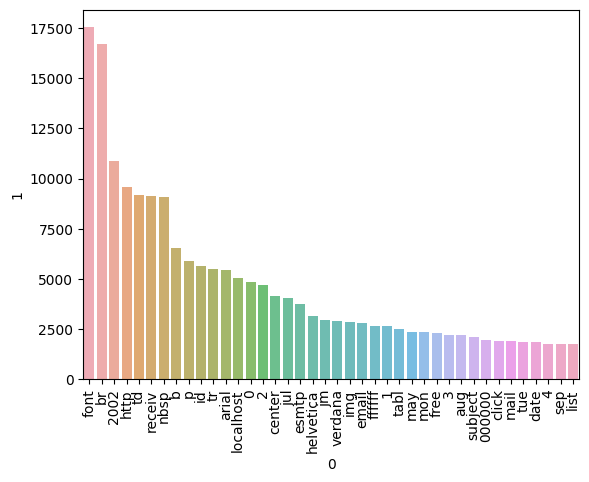

In [56]:
sns.barplot(x=dataframe[0],y=dataframe[1],alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
#find most words use in ham 
ham_corpus=[]
for msg in df[df.target == 0 ]['trasformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
        

In [58]:
len(ham_corpus)

762371

In [59]:
Counter(ham_corpus).most_common(40)

[('2002', 32008),
 ('receiv', 22138),
 ('localhost', 20026),
 ('id', 16394),
 ('http', 13830),
 ('esmtp', 13545),
 ('aug', 11367),
 ('sep', 9407),
 ('mailto', 8885),
 ('jm', 8334),
 ('postfix', 7036),
 ('fork', 5907),
 ('wed', 5898),
 ('mon', 5828),
 ('ist', 5399),
 ('tue', 5326),
 ('thu', 5234),
 ('jul', 5013),
 ('oct', 4884),
 ('date', 4672),
 ('fri', 4348),
 ('subject', 4171),
 ('yyyi', 3985),
 ('use', 3740),
 ('list', 3728),
 ('1', 3551),
 ('imap', 3524),
 ('jalapeno', 3514),
 ('ilug', 3241),
 ('mail', 2939),
 ('sender', 2932),
 ('edt', 2892),
 ('preced', 2857),
 ('bulk', 2752),
 ('pdt', 2521),
 ('messag', 2286),
 ('2', 2197),
 ('linux', 2178),
 ('get', 2118),
 ('smtp', 2105)]

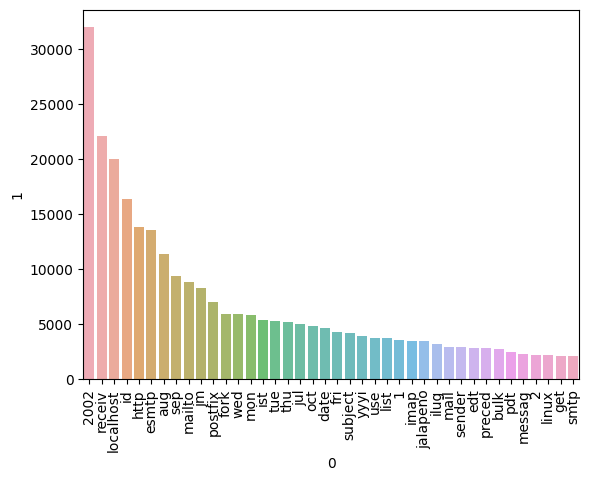

In [60]:
ham_ataframe = pd.DataFrame(Counter(ham_corpus).most_common(40))
sns.barplot(x=ham_ataframe[0],y=ham_ataframe[1],alpha=0.8)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
#we use 1. bag of words 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [62]:
X = tfidf.fit_transform(df['trasformed_text']).toarray()

In [63]:
X.shape

(5329, 64035)

In [64]:
y = df.target.values

In [65]:
y.shape

(5329,)

In [66]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=23)

# for train_index, test_index in sss.split(X, y):
#     train_X, test_X = X.loc[train_index], X.loc[test_index]
#     train_y, test_y = y.loc[train_index], y.loc[test_index]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)




In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
gnb= GaussianNB()
mnb = MultinomialNB(force_alpha=True)
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'GNB' : gnb,
    'MNB' : mnb,
    'bnb' : bnb,
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [71]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.991869918699187, 0.9900793650793651)

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For  GNB
Accuracy -  0.9624765478424016
Precision -  0.9725158562367865
For  MNB
Accuracy -  0.8943089430894309
Precision -  0.9970588235294118
For  bnb
Accuracy -  0.9337085678549093
Precision -  0.9878345498783455
For  SVC
Accuracy -  0.991869918699187
Precision -  0.9900793650793651
For  KN
Accuracy -  0.9462163852407754
Precision -  0.9839080459770115
For  NB
Accuracy -  0.8943089430894309
Precision -  0.9970588235294118
For  DT
Accuracy -  0.9618511569731082
Precision -  0.9665271966527197
For  LR
Accuracy -  0.9737335834896811
Precision -  0.9774127310061602
For  RF
Accuracy -  0.9849906191369606
Precision -  0.9979381443298969
For  AdaBoost
Accuracy -  0.9874921826141339
Precision -  0.9860279441117764
For  BgC
Accuracy -  0.975609756097561
Precision -  0.9736842105263158
For  ETC
Accuracy -  0.9843652282676673
Precision -  0.9958847736625515
For  GBDT
Accuracy -  0.981863664790494
Precision -  0.9897540983606558
For  xgb
Accuracy -  0.9924953095684803
Precision -  0.99798792756

In [73]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,Precision
13,xgb,0.992495,0.997988
8,RF,0.984991,0.997938
1,MNB,0.894309,0.997059
5,NB,0.894309,0.997059
11,ETC,0.984365,0.995885
3,SVC,0.991870,0.990079
12,GBDT,0.981864,0.989754
2,bnb,0.933709,0.987835
9,AdaBoost,0.987492,0.986028
4,KN,0.946216,0.983908


In [77]:
import pickle


In [78]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [79]:
pickle.dump(xgb,open('model.pkl','wb'))

In [80]:
msg_preprocessor = pickle.load(open('vectorizer.pkl','rb'))
msg_model = pickle.load(open('model.pkl','rb'))

In [ ]:
# Applying stacking
from sklearn.ensemble import StackingClassifier
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

NameError: name 'SVC' is not defined

In [81]:
transform_msg =transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

In [82]:
transform_msg


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [83]:
convert_to_vector = msg_preprocessor.transform([transform_msg])


In [84]:
msg_model.predict(convert_to_vector)

array([1])